In [1]:
# Importing the necessary packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the Data
df = pd.read_csv('diabetes.csv')

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


*   `Pregnancies`: Number of previous pregnancies
*   `Glucose`: Plagma glucose concentration
*   `BloodPressure`: Diastolic blood pressure
*   `SkinThickess`: Skin fold thickness measured from the triceps
*   `Insulin`: Blood serum insulin concentration
*   `BMI`: Body Mass Index
*   `DiabetesPedigreeFunction`: A summerized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
*   `Age`: Age in years
*   `Outcome`: The target variable we are trying to predict , 1 for patients that developed diabetes within 5 years of the initial measurement and 0 otherwise

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

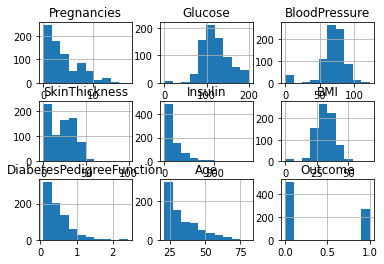

In [4]:
# Visualising the data
df.hist()

C:\Users\rishi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rishi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rishi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

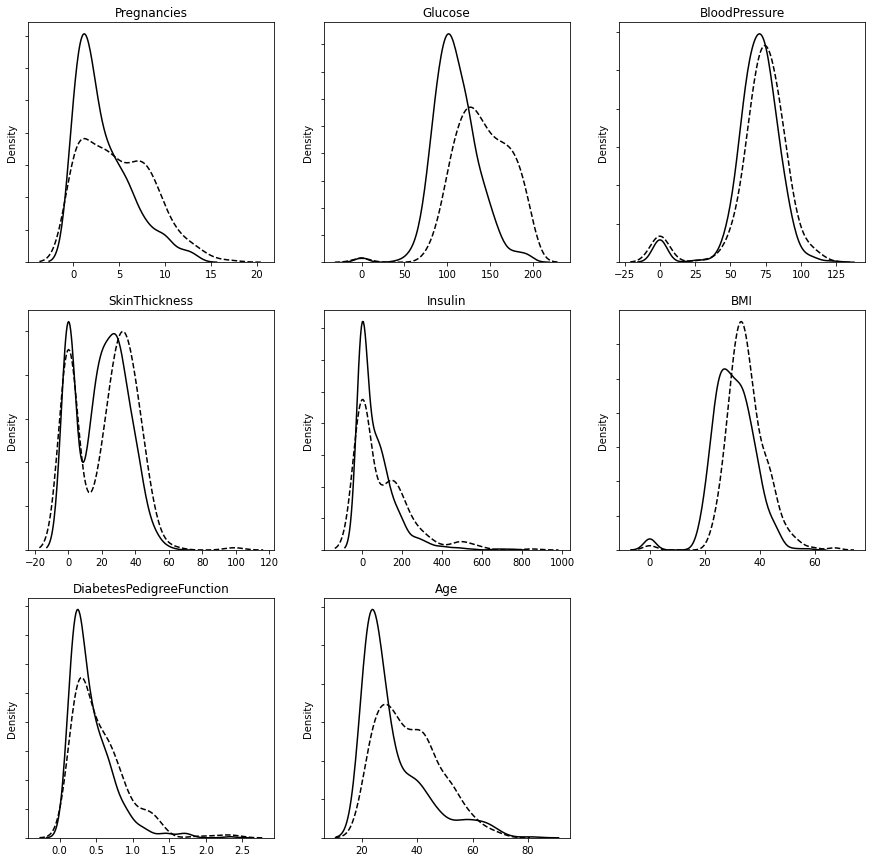

In [5]:

# Creating subplots of 3x3
plt.subplots(3,3,figsize=(15,15))

# Plotting a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    
#Hiding the 9th subplot (bottom right since there are only 8 plots)
plt.subplot(3,3,9).set_visible(False)

plt.show()


100mg/dL

*   Dash line is Diabetics
*   Solid line is non-Diabetics


150mg/dL


In [6]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [7]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There are several techniques to handle these missing values:


*   Remove (discard) any rows with missing values
*   Replace the missing values with the mean/median/mode of the non-missing values.


*   Predict the actual values using a seperate machine learning model





In [9]:
#Replace 0 value with NaN
import numpy as np
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)

df['BMI'] = df['BMI'].replace(0,np.nan)

In [10]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [11]:
# Replace Nan values with the mean of the non-missing values by using fillna()

In [12]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit varianace.


*   Insulin and DiabetesPedigreeFunction have vastly differennt scales. The maximum value for Insulin is 846 while the maximum value for DiabetesPedigreeFunction is only 2.42




In [13]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
print(df.describe().loc[['mean','std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  




1.   Training set: The neural network will be trained on this subset of the data
2.   Validation set: This set of data allows us to perform hyperparameter tuning(That is, tuning the number of hidden layers) using an unbiased source of data
1.   Testing set: The final evaluation of the neural network will be based on this subset of the data.
The purpose of splitting the data into training, testing and validation sets is to avoid overfitting and to provide an unbiased source of data for evaluating performance

*   If we allocate most of our data for training purposes, model performance will increase at the detriment of our ability to avoid overfitting.
*   If we allocate most of our data for validation and testing purposes, model performance will decrease as there might be insufficient data for training.

There are some steps:

*   Original data is 1st spliited into training (80%) and testing (20%)
*   Training set is 2nd splitted into training set, validation set and testing set.
Splitting data must be done at random
*   First, let's seperate the dataset into X(input features) and y(target variable)











In [14]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
# Split the data into training set(80%) and the testing set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Make a second split to create the final training set and the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2)

In [15]:
from keras.models import Sequential
model = Sequential()



*   The first hidden layer will have 32 nodes
*   The input dimension will be 8 because there 8 columns in X_train



In [16]:
from keras.layers import Dense # Add the first Hidden layer
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))# Add the second hidden layer
model.add(Dense(1, activation='sigmoid'))

There are three different parameters we need to define for the training process

*   Optimizer: Let's use the adam optimizer, whihc is a popular optimizer in Keras. For most datasets, the adam optimizer will work well without much tuning
*   Loss function: We will use binary_crossentropy as our loss function since the problem at hand is a binary classification problem.

*   Metrics: We will use accuracy (that is the percentage of correctly classified samples) as our evaluation metric.






In [17]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#Train the model for 200 epochs
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 0.7243 - accuracy: 0.6110
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6558
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.6864
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7312
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7576
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7678
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7760
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7760
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7739
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.7780
Epoch 11/

16/16 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8432
Epoch 84/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8452
Epoch 85/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8452
Epoch 86/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8493
Epoch 87/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8452
Epoch 88/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8493
Epoch 89/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8513
Epoch 90/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8473
Epoch 91/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8432
Epoch 92/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8534
Epoch 93/200


16/16 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.8900
Epoch 165/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.8880
Epoch 166/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.8880
Epoch 167/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.8900
Epoch 168/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8900
Epoch 169/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8880
Epoch 170/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.8880
Epoch 171/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.8921
Epoch 172/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.8880
Epoch 173/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.8961
Epoc

In [19]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9145
Training Accuracy: 91.45%

5/5 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7208
Testing Accuracy: 72.08%





*   True negative: Actual class is negative (no diabetes), and the model predicted negative (no diabetes)
*   False positive : Actual class is negative (no diabetes), but the model predicted positive (diabetes)


*   False negative: Actial class is positive (diabetes) but the model predicted negative (no diabetes)
*   True positive: Actual class is positve (diabetes), and the model predicted positive (diabetes)





5/5 [==============================] - 0s 1ms/step


Text(33.0, 0.5, 'Actual')

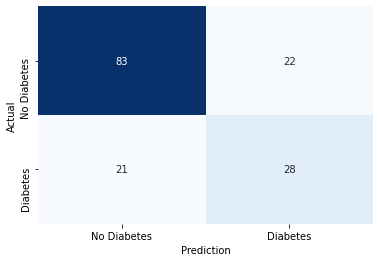

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cbar= False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")



*   True positive rate (TPR) = True positive / (True positive + false negative)
*   False positive Rate (FPR) = False positive /(true Negative + False Positive)



In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)
FPR,TPR, _= roc_curve(y_test,y_test_pred_probs)

5/5 [==============================] - 0s 877us/step


Text(0, 0.5, 'True Positive Rate')

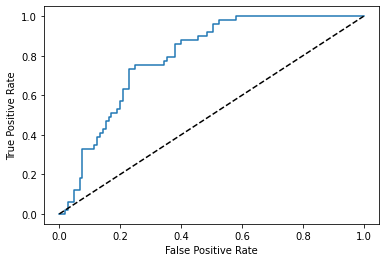

In [22]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')#diagonal line

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')